<h1>Final Project: Best Neighbourhood in Pittsburgh

<h2> Introduction

In our analysis to determine the best neighborhood in Pittsburgh's neighborhoods, we analyzed three datasets. Initially focusing on aspects like Smart Trash Can usage, School Enrollment, and Parks accessibility to determine how livable the neighborhood is. Our metric is 'livability,' which makes sure the neighborhood has opportunities, making it feel like a community, and making it a great place to live.

<h2> Metric

In our assessment of Pittsburgh's neighborhoods, we looked at three datasets, Smart Trash Can usage, School Enrollment, and Parks accessibility. These metrics allowed us to determine the community cleanliness, educational opportunities, and recreational spaces. We originally were going to include Arrests data, to determine which neighborhoods were safer in terms of crime rates, but the data was in latitude and longitude and made it hard to determine which neighborhoods had lower crime rates than others.

<h2> Analysis

<h3> Smart Trash Containers

One of the factors of our best neighbourhood is the number of smart trash containers in neighbourhoods. This factored into our metric of livability because the more recyclying is enforced the better the community is, and its better for the environment.

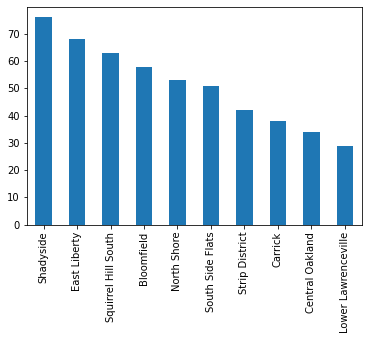

In [7]:
import pandas as pd
trash = pd.read_csv("smarttrashcontainers.csv")
trash = trash['neighborhood'].value_counts().head(10)
trash.plot.bar()

Above I am just reading in the dataset, and I only needed to count the number of times each neighbourhood was mentioned in a log since the data set contained every smart trash container in Pittsburgh (excluding those in community spaces). I then just print out the formattted data set that tells me which neighbourhoods have the highest number of smart trash containers. From this bar graph we can deduct that the neighbourhood with the most smart trash containers would be Shadyside, with East Liberty and Squirrel Hill South. 

<h3> Number of Students Enrolled in Schools

One of the factors of our best neighbourhood is the number of students enrolled in schools. This is important because the larger number of children indicates a larger amount of families in the area. Additionally, schools with more students tend to get more funding making the school a good place to attend and a better area to live in which is our metric.

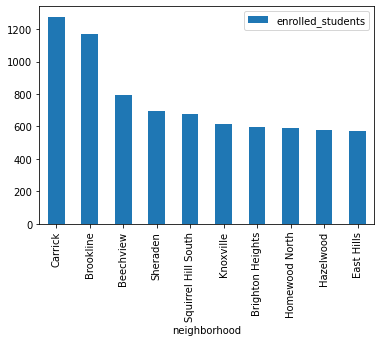

In [8]:
students = pd.read_csv("neighborhood_school_enrollment.csv")
students.drop('school', inplace=True, axis=1)
students = students.groupby('neighborhood', as_index=False).sum()
students.set_index('neighborhood', drop = True, append = False, inplace = True, verify_integrity = False)
students = students.sort_values(by='enrolled_students', ascending = False).head(10)
students.plot.bar()

I started by dropping the columns that included the names of the school since that wasn't important. I then realized that the dataset had multiple schools in a neighbourhood so I had to combine the rows with the same neighbourhood into one row.

<h3> Parks 

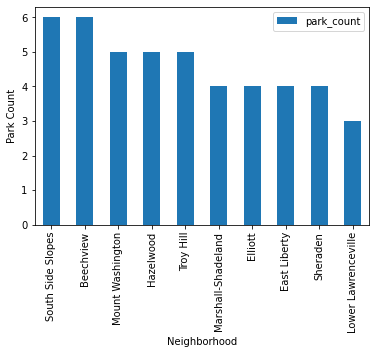

In [11]:
import matplotlib.pyplot as plt
file = pd.read_csv("parks.csv")
columns_to_drop = ['_id', 'id', 'maintenance_responsibility', 'image', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']
file = file.drop(columns_to_drop, axis=1)
grouped_file = file.groupby(['name', 'neighborhood', 'type'], as_index=False).sum()
parks_only = grouped_file[grouped_file['type'] == 'Park']
neighborhood_parks_count = parks_only.groupby('neighborhood')['name'].count().reset_index()
neighborhood_parks_count.columns = ['neighborhood', 'park_count']
sorted_neighborhoods = neighborhood_parks_count.sort_values(by='park_count', ascending=False)
data = neighborhood_parks_count.sort_values(by='park_count', ascending=False)
ndata = data.head(10)
ndata.plot(kind='bar', x='neighborhood', y='park_count')
plt.xlabel('Neighborhood')
plt.ylabel('Park Count')
plt.show()

I read in the data and had it show only the name, neighborhood, and type. The reason I kept type was because the data counted traffic circles and mediums as a park. However, I want analyze actual walkable parks. I had it take the top ten, then sort by getting rid of anything in the 'type' colunn that wasn't listed as a 'park'. Then, I had it sort the data by which neighborhoods had the most parks and put it at the top of the list. From this graph you can see clearly the South Side Slopes and Beechview have the most parks. In order to determine which of the two is better, we must take into account the other data and compare if it exvels in other aspects other than just how many parks it has.

<h3> Conclusion: The Best Neighbourhood

After looking at all the data we concluded that the best neighbourhood in Pittsburgh was Squirrel Hill South. Squirrel Hill South appears 3rd in the smart trash data, and 5th in the number of students enrolled in school and 14th in the park count data set but the four neighbourhoods before it have the same number of parks as Squirrel Hill South. Squirrel Hill South has 3 parks and was placed 14th when we analyzed the data but if you look at the graph Lower Lawrenceville also has 3 parks so it's still pretty high up in the data set in terms of numebr of parks. It was also easy to conclude that the difference between 6 parks and 3 parks wasn't that big of a factor in terms of livability since 3 parks seemed more than enough to make it a good neighbourhood to live in, it had an abundant number of smart trash containers and students enrolled in schools.

In [21]:
print(data.iloc[13])

neighborhood    Squirrel Hill South
park_count                        3
Name: 59, dtype: object
